In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [17]:
sales_df = pd.read_csv(r"C:\Users\MAAHEE\OneDrive\Desktop\Manikanta\Developers Intern\WEEK-5\sales_data.csv")
customer_df = pd.read_csv(r"C:\Users\MAAHEE\OneDrive\Desktop\Manikanta\Developers Intern\WEEK-5\customer_churn.csv")

sales_df.head(), customer_df.head()


(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [18]:
print("Sales Data Info:")
sales_df.info()

print("\nCustomer Data Info:")
customer_df.info()


Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB

Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMe

In [19]:
# Handle missing values
sales_df.fillna(0, inplace=True)
customer_df.fillna("Unknown", inplace=True)

# Remove duplicates
sales_df.drop_duplicates(inplace=True)
customer_df.drop_duplicates(inplace=True)


In [20]:
# Convert Date column to datetime
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

# Extract date parts
sales_df["Year"] = sales_df["Date"].dt.year
sales_df["Month"] = sales_df["Date"].dt.month
sales_df["Day"] = sales_df["Date"].dt.day


In [21]:
merged_df = pd.merge(
    sales_df,
    customer_df,
    left_on="Customer_ID",
    right_on="CustomerID",
    how="left"
)

merged_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,2024-01-01,Phone,7,37300,CUST001,East,261100,2024,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-03,Phone,2,21746,CUST003,West,43492,2024,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,2024,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Total revenue
total_revenue = merged_df["Total_Sales"].sum()

# Revenue per customer
customer_revenue = merged_df.groupby("Customer_ID")["Total_Sales"].sum()

# Top 5 customers
top_customers = customer_revenue.sort_values(ascending=False).head(5)

total_revenue, top_customers


(np.int64(12365048),
 Customer_ID
 CUST016    373932
 CUST007    363870
 CUST083    350888
 CUST073    349510
 CUST020    333992
 Name: Total_Sales, dtype: int64)

In [23]:
# High-value customers from specific regions
high_value_customers = merged_df[
    (merged_df["Total_Sales"] > 5000) &
    (merged_df["Region"].isin(["North", "South"]))
]

high_value_customers.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Year,Month,Day,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,2024,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,2024,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-06,Laptop,7,40420,CUST006,South,282940,2024,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-01-07,Laptop,9,40430,CUST007,South,363870,2024,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-01-09,Tablet,3,32791,CUST009,North,98373,2024,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Normalize product names
merged_df["Product"] = merged_df["Product"].str.upper()

merged_df["Product"].unique()


array(['PHONE', 'HEADPHONES', 'LAPTOP', 'TABLET', 'MONITOR'], dtype=object)

In [25]:
monthly_sales = merged_df.groupby("Month")["Total_Sales"].sum()
monthly_sales


Month
1    4120524
2    2656050
3    4485006
4    1103468
Name: Total_Sales, dtype: int64

In [26]:
pivot_table = pd.pivot_table(
    merged_df,
    values="Total_Sales",
    index="Region",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

pivot_table


Product,HEADPHONES,LAPTOP,MONITOR,PHONE,TABLET
Region,,,,,
East,288361,221946,642870,506828,859634
North,107091,1798206,397100,489284,1191954
South,512168,1373120,39924,1471428,341212
West,476413,495938,268177,391854,491540


In [27]:
os.makedirs("visualizations", exist_ok=True)


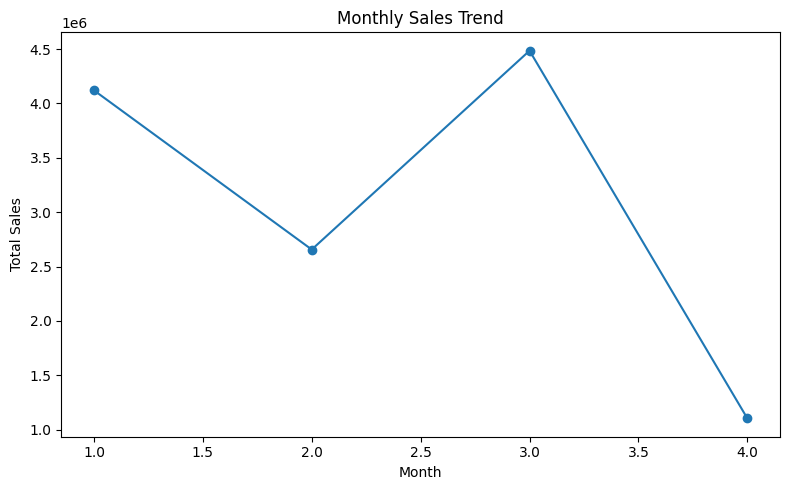

In [28]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


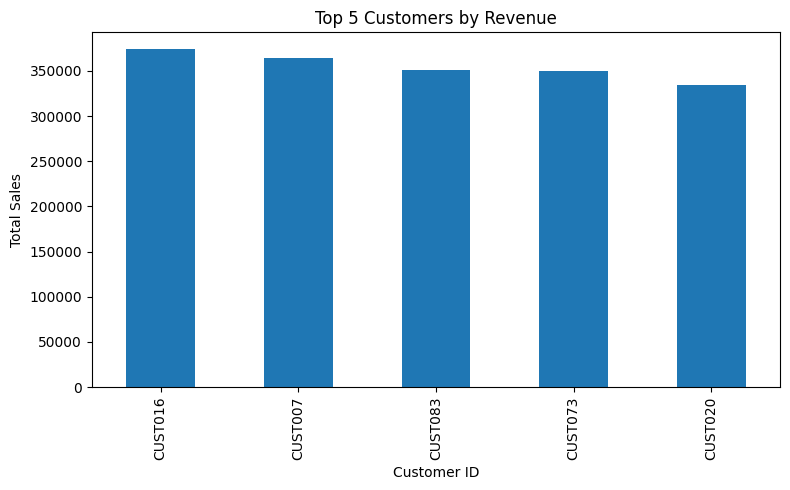

In [29]:
plt.figure(figsize=(8,5))
top_customers.plot(kind="bar")
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


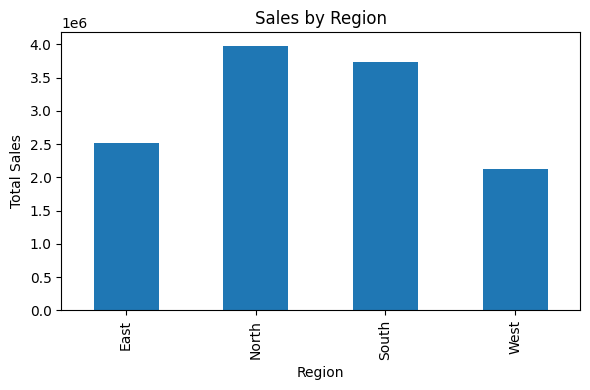

In [30]:
region_sales = merged_df.groupby("Region")["Total_Sales"].sum()

plt.figure(figsize=(6,4))
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("visualizations/sales_by_region.png")
plt.show()


In [32]:
print("===== CUSTOMER SALES ANALYSIS REPORT =====")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {merged_df['Customer_ID'].nunique()}")
print(f"Average Order Value: ${merged_df['Total_Sales'].mean():,.2f}")
print("\nTop 5 Customers:")
print(top_customers)


===== CUSTOMER SALES ANALYSIS REPORT =====
Total Revenue: $12,365,048.00
Total Customers: 100
Average Order Value: $123,650.48

Top 5 Customers:
Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
Name: Total_Sales, dtype: int64
